# Question 2: Problem of Generating New Data

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

handwritten digits dataset available in sklearn.

In [6]:
digits = datasets.load_digits()

n_samples = len(digits.images)
data = digits.data
print np.shape(data)
column=set(digits.target)
print column
print data

(1797, 64)
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


# Apply dimensionality reduction using PCA , to reduce the number of features to 3 values in the range 15 to 41.

In [7]:
print "original data: ", np.shape(data)
from sklearn import decomposition
def pca_decom(data,features):
    pca = decomposition.PCA(n_components=features)
    pca.fit(data)
    data = pca.transform(data)
    return data,pca


d15,pca15=pca_decom(data,15)
print "pca reduction to 15 features",np.shape(d15)
d30,pca30=pca_decom(data,30)
print "pca reduction to 30 features",np.shape(d30)
d41,pca41=pca_decom(data,41)
print "pca reduction to 41 features",np.shape(d41)

original data:  (1797, 64)
pca reduction to 15 features (1797, 15)
pca reduction to 30 features (1797, 30)
pca reduction to 41 features (1797, 41)


# Part-1: (10 points): Kernel Density Estimation: 

Use grid search cross validation on the reduced feature data to optimize bandwidth
Compute Kernel Density Estimate

In [4]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

def kde(data):
    # use grid search cross-validation to optimize the bandwidth
    parameters = {'bandwidth': np.logspace(-1, 1, 20)}
    grid = GridSearchCV(KernelDensity(), parameters, cv=5)
    grid.fit(data)

    print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

    # use the best estimator to compute the kernel density estimate
    kde = grid.best_estimator_
    return kde

In [5]:
kde_15=kde(d15)
print kde_15

best bandwidth: 3.79269019073
KernelDensity(algorithm='auto', atol=0, bandwidth=3.79269019073225,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


In [6]:
kde_30=kde(d30)
print kde_30

best bandwidth: 2.97635144163
KernelDensity(algorithm='auto', atol=0, bandwidth=2.9763514416313175,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


In [7]:
kde_41=kde(d41)
print kde_41

best bandwidth: 2.33572146909
KernelDensity(algorithm='auto', atol=0, bandwidth=2.3357214690901213,
       breadth_first=True, kernel='gaussian', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)


# Part-2: (10 points) Gaussian Mixture Model based Density Estimation:

Use Bayesian Information Criteria to find the number of GMM components we
should use Apply GMM using the above number of components

In [13]:
from sklearn.mixture import GaussianMixture as GMM
def gmm_bic(data):
    n_components = np.arange(50, 600,10)
    models = [GMM(n, covariance_type='full', random_state=0) for n in n_components]
    bics = [model.fit(data).bic(data) for model in models]
    plt.plot(n_components, bics)

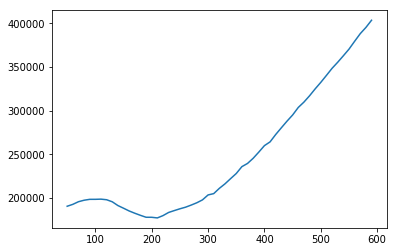

In [9]:
gmm_bic(d15)

In [14]:
gmm = GMM(190, covariance_type='full', random_state=0)
gmm_15=gmm.fit(d15)
print gmm_15

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=190, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


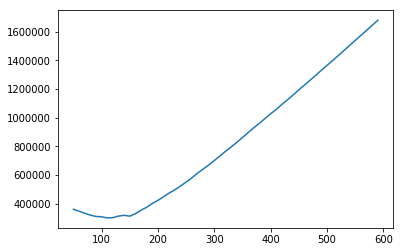

In [11]:
gmm_bic(d30)

In [12]:
gmm = GMM(110, covariance_type='full', random_state=0)
gmm_30=gmm.fit(d30)
print gmm_30

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=110, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


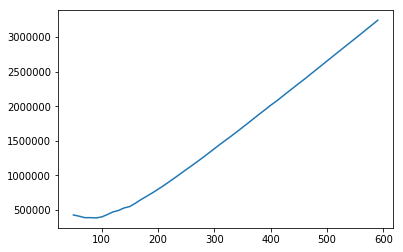

In [13]:
gmm_bic(d41)

In [10]:
gmm = GMM(90, covariance_type='full', random_state=0)
gmm_41=gmm.fit(d41)
print gmm_41

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=90, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


# Part-3: (10 points)
Draw 48 new points in the projected spaces using both the above generative models. Use Inverse transform of PCA to construct new digits. Plot these points from both the models.

In [15]:
def plot_digits(data):
    fig, ax = plt.subplots(8, 6, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    for i, axi in enumerate(ax.flat):
        print data[i].shape
        im = axi.imshow(data[i].reshape(8, 8), cmap = 'Greys')
        im.set_clim(0, 16)

GMM for data with 15 features


shape:  (48, 15)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)
(64,)


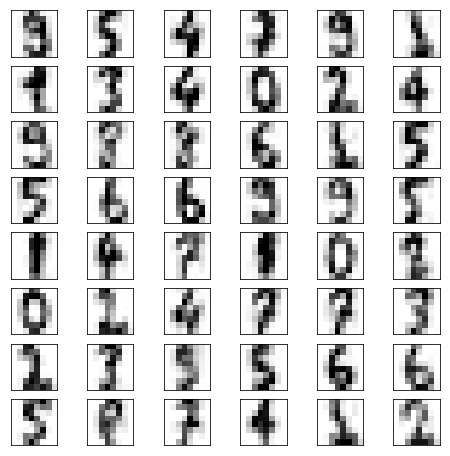

In [16]:
        
newData_gmm_15,Y = gmm_15.sample(48)
print "shape: ",np.shape(newData_gmm_15)
digits_new_gmm_15= pca15.inverse_transform(newData_gmm_15)
plot_digits(digits_new_gmm_15)

KDE for data with 15 features

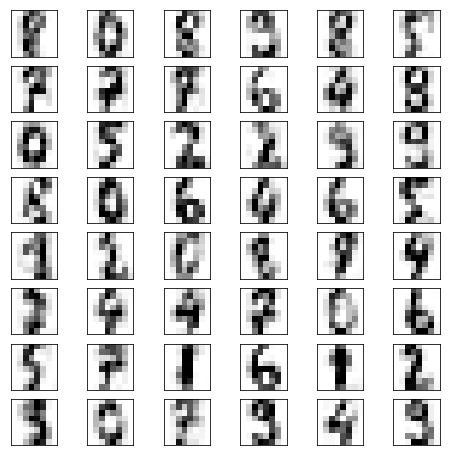

In [17]:
newData_kde_15 = kde_15.sample(48)
digits_new_kde_15 = pca15.inverse_transform(newData_kde_15)
plot_digits(digits_new_kde_15)


GMM for data with 30 features

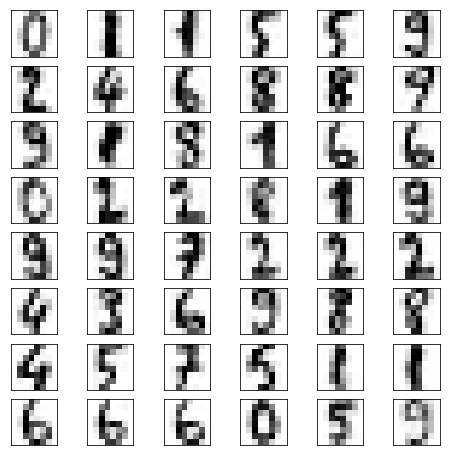

In [18]:
newData_gmm_30, y1= gmm_30.sample(48)
digits_new_gmm_30 = pca30.inverse_transform(newData_gmm_30 )
plot_digits(digits_new_gmm_30)



KDE for data with 30 features

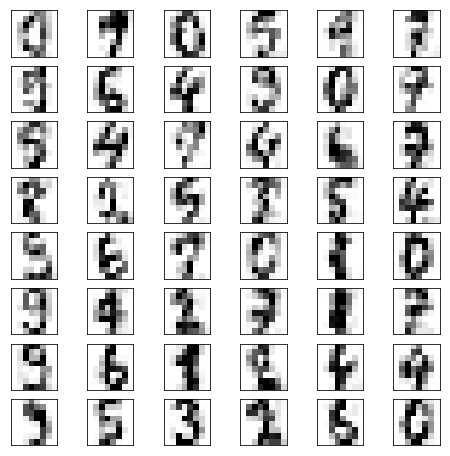

In [19]:
newData_kde_30 = kde_30.sample(48)
digits_new_kde_30 = pca30.inverse_transform(newData_kde_30)
plot_digits(digits_new_kde_30)

GMM for data with 41 features

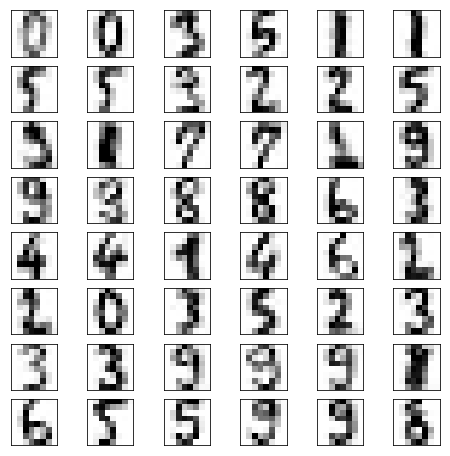

In [20]:

newData_gmm_41,y2 = gmm_41.sample(48)
digits_new_gmm_41 = pca41.inverse_transform(newData_gmm_41)
plot_digits(digits_new_gmm_41)


KDE for data with 41 features

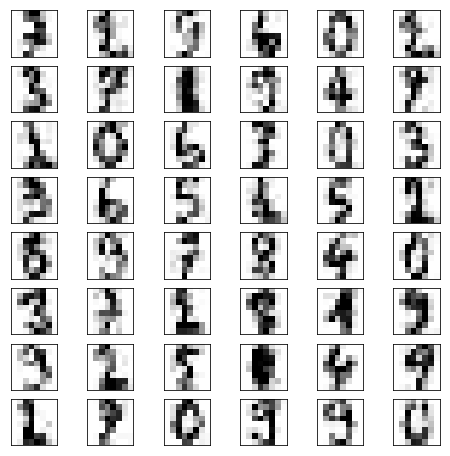

In [21]:
newData_kde_41 = kde_41.sample(48)
digits_new_kde_41 = pca41.inverse_transform(newData_kde_41)
plot_digits(digits_new_kde_41)
